<a href="https://colab.research.google.com/github/marlonrcfranco/weather-guru/blob/main/weather_guru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# weather-guru
## Will it rain tomorrow?


### Goal 🌦
Implement an algorithm that performs **next day rain prediction** by training machine learning models on the target variable `RainTomorrow`.



### Dataset 📂
The dataset contains about **10 years of daily weather observations** from various locations in **Australia**.

**`RainTomorrow`** is the target variable to be  predicted. It means - it rained the next day, this column is `Yes` if the rain that day was 1mm or more.







## Imports

In [1]:
import pandas as pd

# _________________________________________________

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from pandas.api.types import is_numeric_dtype
import numpy as np
import math
import cmath
import os
from six.moves import urllib
from ftplib import FTP
from io import StringIO
from IPython.display import clear_output
from functools import reduce
import tarfile
import subprocess
#subprocess.run(["ls", "-l"])
import zipfile
import shutil # move files
import psutil
import gc
from numba import vectorize,jit,njit
import cProfile
from scipy import stats
import pyarrow as pa
import datetime
import json

import plotly.graph_objs as go


## Defines

In [2]:
DATASET_URL = "https://raw.githubusercontent.com/marlonrcfranco/weather-guru/main/data/weatherAUS.csv"


# -------------------------------------------------
ROOT_PATH = "drive/My Drive/TCC/datasets/"
PROJECT_PATH = ROOT_PATH+"GHCN_Data/data/"

SOYBEAN_PATH = "datasets/CBOTSoybeanFutures/"
WEATHER_PATH = "datasets/GHCN_Data/"
WEATHER_PATH_FINAL = PROJECT_PATH+'final/'
WEATHER_PATH_DRIVE_ZIP = PROJECT_PATH
WEATHER_PATH_DRIVE_CSV = "content/drive/My Drive/TCC/datasets/GHCN_Data/data/csv/datasets/GHCN_Data/"
USDA_PATH = "datasets/USDA-NASS-soybeans-production_bushels-2015/"
SOYBEAN_URL = "http://www.quandl.com/api/v3/datasets/CHRIS/CME_S1/data.csv"
DOWNLOADED_STATIONS_FILE = ROOT_PATH+"downloaded_stations.txt"
DOWNLOADED_STATIONS_FILE_TEMP = "downloaded_stations.txt"

SOY = 'Soybean, CBOT Soybean Futures'
GHCN = 'Global Historical Climatology Network (GHCN)'
USDA = 'USDA-NASS-soybeans-production_bushels-2015'

#plt.rcParams["figure.figsize"] = [19,15]
#plt.rcParams.update({'font.size': 27})

CSV_PATH = PROJECT_PATH+"csv/"
FIXED_STATE_FILE = PROJECT_PATH+"fixed_states.txt"
CALCULATED_STATE_FILE = PROJECT_PATH+"calculated_states.txt"
NEW_CALCULATED_STATE_FILE = PROJECT_PATH+"new_calculated_states.txt"
ERROR_FILE = PROJECT_PATH+'error.txt'
FILE_INFO_STATE = PROJECT_PATH+'info_states.json'
FILE_USDA_STATES = PROJECT_PATH+'USDA_states.csv'

KEYS = ['MM/DD/YYYY','YEAR','MONTH','DAY']
NEW_KEYS = ['Date','YEAR','MONTH','DAY']
COLUMN_NAMES = ['Date','YEAR','MONTH','DAY','ID','TMAX','TMIN','TAVG','PRCP']
STR_COLUMNS = ['YEAR','MONTH','DAY']

STATES_NOT = 'AK\nAZ\nCA\nCO\nCT\nDC\nHI\nID\nMA\nME\nMT\nNH\nNM\nNV\nOR\nPI\nRI\nUM\nUT\nVT\nWA\nWY\n'


## Fetch Data

In [3]:
weather_dataframe = pd.read_csv(DATASET_URL)

# Dataset is now stored in a Pandas Dataframe

## Visualize Data

### Data Sample

In [16]:
weather_dataframe.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
95415,2015-01-03,Townsville,25.0,28.1,4.4,7.6,1.0,SE,37.0,SE,SE,13.0,11.0,86.0,90.0,1012.6,1010.3,7.0,8.0,27.3,26.5,Yes,Yes


### Data Info

In [11]:
weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Histograms

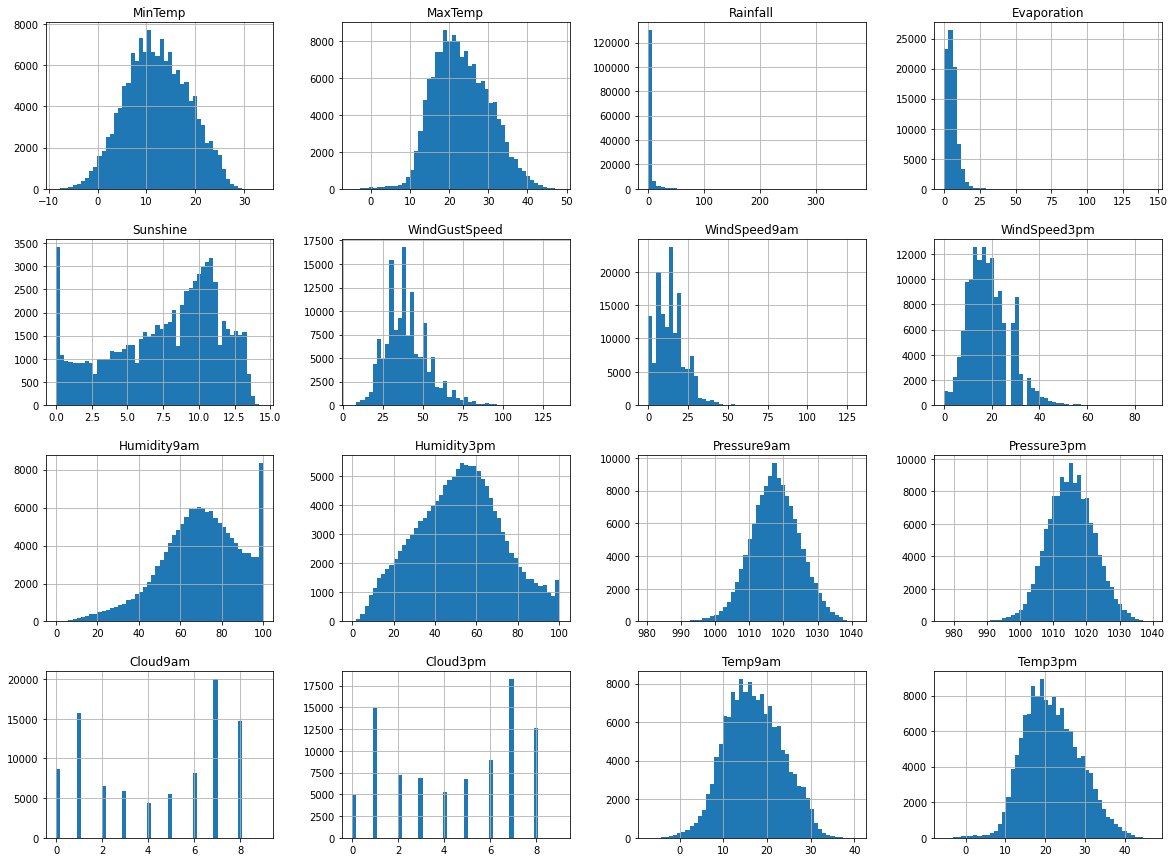

In [15]:
weather_dataframe.hist(bins=50, figsize=(20,15))
plt.show()

### Time Series